# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
coords = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coords = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in coords:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 610


['alta floresta',
 'kasongo',
 'new norfolk',
 'itoman',
 'qaanaaq',
 'mataura',
 'yellowknife',
 'albany',
 'rikitea',
 'saleaula',
 'victoria point',
 'jamestown',
 'pontes e lacerda',
 'luanda',
 'pecos',
 'carutapera',
 'carnarvon',
 'cidreira',
 'ojinaga',
 'provideniya',
 'mar del plata',
 'ulety',
 'bell ville',
 'richards bay',
 'bethel',
 'saint-philippe',
 'ondorhaan',
 'hastings',
 'hovd',
 'amderma',
 'quatre cocos',
 'udine',
 'opuwo',
 'cape town',
 'saint-pierre',
 'turan',
 'saskylakh',
 'kapaa',
 'ushuaia',
 'tilichiki',
 'cherskiy',
 'taolanaro',
 'punta arenas',
 'vestmannaeyjar',
 'dikson',
 'russas',
 'hilo',
 'weligama',
 'kushtagi',
 'lubango',
 'tuatapere',
 'lorengau',
 'avarua',
 'half moon bay',
 'lebu',
 'bayan',
 'dunedin',
 'tombouctou',
 'halifax',
 'lagos',
 'makasar',
 'teya',
 'nanortalik',
 'samusu',
 'mersing',
 'kaitangata',
 'erenhot',
 'tarudant',
 'kavieng',
 'busselton',
 'sentyabrskiy',
 'yoichi',
 'biak',
 'atbasar',
 'stepnyak',
 'san patrici

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Create counters
record_count = 1
set_count = 1

In [4]:
# Print to log that data retrieval's starting.
print("Beginning Data Retrieval...")
print("-----------------------------")

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&units=imperial&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_wthr = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_wthr['coord']['lat']
        city_lon = city_wthr['coord']['lon']
        city_tempmax = city_wthr['main']['temp_max']
        city_humid = city_wthr['main']['humidity']
        city_cloud = city_wthr['clouds']['all']
        city_wind = city_wthr['wind']['speed']
        city_nation = city_wthr['sys']['country']
        city_date = city_wthr['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_tempmax,
                          "Humidity": city_humid,
                          "Cloudiness": city_cloud,
                          "Wind Speed": city_wind,
                          "Country": city_nation,
                          "Date": city_date})
        print("City data retrieved. Parsing next city.")

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval...
-----------------------------
Processing Record 1 of Set 1 | alta floresta
City data retrieved. Parsing next city.
Processing Record 2 of Set 1 | kasongo
City data retrieved. Parsing next city.
Processing Record 3 of Set 1 | new norfolk
City data retrieved. Parsing next city.
Processing Record 4 of Set 1 | itoman
City data retrieved. Parsing next city.
Processing Record 5 of Set 1 | qaanaaq
City data retrieved. Parsing next city.
Processing Record 6 of Set 1 | mataura
City data retrieved. Parsing next city.
Processing Record 7 of Set 1 | yellowknife
City data retrieved. Parsing next city.
Processing Record 8 of Set 1 | albany
City data retrieved. Parsing next city.
Processing Record 9 of Set 1 | rikitea
City data retrieved. Parsing next city.
Processing Record 10 of Set 1 | saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | victoria point
City data retrieved. Parsing next city.
Processing Record 12 of Set 1 | jamestown
City data retrieved. 

City data retrieved. Parsing next city.
Processing Record 4 of Set 3 | ongandjera
City data retrieved. Parsing next city.
Processing Record 5 of Set 3 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 3 | meulaboh
City data retrieved. Parsing next city.
Processing Record 7 of Set 3 | vaini
City data retrieved. Parsing next city.
Processing Record 8 of Set 3 | acapulco
City data retrieved. Parsing next city.
Processing Record 9 of Set 3 | bredasdorp
City data retrieved. Parsing next city.
Processing Record 10 of Set 3 | soyo
City data retrieved. Parsing next city.
Processing Record 11 of Set 3 | hualmay
City data retrieved. Parsing next city.
Processing Record 12 of Set 3 | bluff
City data retrieved. Parsing next city.
Processing Record 13 of Set 3 | la rioja
City data retrieved. Parsing next city.
Processing Record 14 of Set 3 | norman wells
City data retrieved. Parsing next city.
Processing Record 15 of Set 3 | paamiut
City data retrieved. Parsing next city.
Proce

City data retrieved. Parsing next city.
Processing Record 7 of Set 5 | makakilo city
City data retrieved. Parsing next city.
Processing Record 8 of Set 5 | wielun
City data retrieved. Parsing next city.
Processing Record 9 of Set 5 | saraland
City data retrieved. Parsing next city.
Processing Record 10 of Set 5 | la ronge
City data retrieved. Parsing next city.
Processing Record 11 of Set 5 | tuktoyaktuk
City data retrieved. Parsing next city.
Processing Record 12 of Set 5 | deputatskiy
City data retrieved. Parsing next city.
Processing Record 13 of Set 5 | baruun-urt
City data retrieved. Parsing next city.
Processing Record 14 of Set 5 | ribeira grande
City data retrieved. Parsing next city.
Processing Record 15 of Set 5 | malartic
City data retrieved. Parsing next city.
Processing Record 16 of Set 5 | san cristobal
City data retrieved. Parsing next city.
Processing Record 17 of Set 5 | kailua
City data retrieved. Parsing next city.
Processing Record 18 of Set 5 | balykshi
City data r

City data retrieved. Parsing next city.
Processing Record 9 of Set 7 | general roca
City data retrieved. Parsing next city.
Processing Record 10 of Set 7 | tygda
City data retrieved. Parsing next city.
Processing Record 11 of Set 7 | rio branco do sul
City data retrieved. Parsing next city.
Processing Record 12 of Set 7 | narsaq
City data retrieved. Parsing next city.
Processing Record 13 of Set 7 | beloha
City data retrieved. Parsing next city.
Processing Record 14 of Set 7 | bathsheba
City data retrieved. Parsing next city.
Processing Record 15 of Set 7 | talesh
City not found. Skipping...
Processing Record 16 of Set 7 | voyvozh
City data retrieved. Parsing next city.
Processing Record 17 of Set 7 | embu
City data retrieved. Parsing next city.
Processing Record 18 of Set 7 | caravelas
City data retrieved. Parsing next city.
Processing Record 19 of Set 7 | bukama
City data retrieved. Parsing next city.
Processing Record 20 of Set 7 | shakawe
City data retrieved. Parsing next city.
Pro

City data retrieved. Parsing next city.
Processing Record 12 of Set 9 | locri
City data retrieved. Parsing next city.
Processing Record 13 of Set 9 | nouadhibou
City data retrieved. Parsing next city.
Processing Record 14 of Set 9 | inhambane
City data retrieved. Parsing next city.
Processing Record 15 of Set 9 | ancud
City data retrieved. Parsing next city.
Processing Record 16 of Set 9 | labytnangi
City data retrieved. Parsing next city.
Processing Record 17 of Set 9 | belmonte
City data retrieved. Parsing next city.
Processing Record 18 of Set 9 | nador
City data retrieved. Parsing next city.
Processing Record 19 of Set 9 | mbacke
City not found. Skipping...
Processing Record 20 of Set 9 | kijang
City data retrieved. Parsing next city.
Processing Record 21 of Set 9 | laguna
City data retrieved. Parsing next city.
Processing Record 22 of Set 9 | athabasca
City data retrieved. Parsing next city.
Processing Record 23 of Set 9 | sioux lookout
City data retrieved. Parsing next city.
Proc

City data retrieved. Parsing next city.
Processing Record 15 of Set 11 | rio gallegos
City data retrieved. Parsing next city.
Processing Record 16 of Set 11 | tessalit
City data retrieved. Parsing next city.
Processing Record 17 of Set 11 | santo antonio do sudoeste
City data retrieved. Parsing next city.
Processing Record 18 of Set 11 | ouargaye
City data retrieved. Parsing next city.
Processing Record 19 of Set 11 | ngukurr
City not found. Skipping...
Processing Record 20 of Set 11 | suntar
City data retrieved. Parsing next city.
Processing Record 21 of Set 11 | atambua
City data retrieved. Parsing next city.
Processing Record 22 of Set 11 | egvekinot
City data retrieved. Parsing next city.
Processing Record 23 of Set 11 | hami
City data retrieved. Parsing next city.
Processing Record 24 of Set 11 | kazalinsk
City not found. Skipping...
Processing Record 25 of Set 11 | lishui
City data retrieved. Parsing next city.
Processing Record 26 of Set 11 | kayanza
City data retrieved. Parsing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df["City"].count()

547

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alta floresta,-9.8756,-56.0861,71.11,96,100,2.75,BR,1675994330
1,kasongo,-4.4500,26.6667,67.62,95,100,2.93,CD,1675994331
2,new norfolk,-42.7826,147.0587,70.88,67,61,1.01,AU,1675994331
3,itoman,26.1247,127.6694,68.40,96,75,23.02,JP,1675994331
4,qaanaaq,77.4840,-69.3632,-9.00,60,0,9.08,GL,1675994332


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alta floresta,-9.8756,-56.0861,71.11,96,100,2.75,BR,1675994330
1,kasongo,-4.4500,26.6667,67.62,95,100,2.93,CD,1675994331
2,new norfolk,-42.7826,147.0587,70.88,67,61,1.01,AU,1675994331
3,itoman,26.1247,127.6694,68.40,96,75,23.02,JP,1675994331
4,qaanaaq,77.4840,-69.3632,-9.00,60,0,9.08,GL,1675994332


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

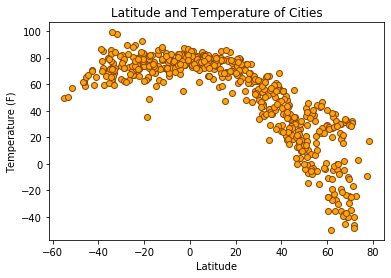

<Figure size 1440x1080 with 0 Axes>

In [25]:
# Error: 'str' object is not callable started popping up with plt.title()
# Reloading matplotlib.pyplot dependency to prevent error occurrence
from importlib import reload
plt = reload(plt)

# Build scatter plot for latitude vs. temperature
x_lat = city_data_df["Lat"]
y_temp = city_data_df["Max Temp"]
plt.scatter(x_lat,y_temp,color='orange',edgecolor='saddlebrown')

# Incorporate the other graph properties
plt.title("Latitude and Temperature of Cities")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.figure(figsize=(20,15))

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

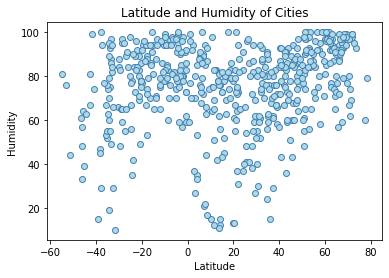

<Figure size 1440x1080 with 0 Axes>

In [26]:
# Build the scatter plots for latitude vs. humidity
x_lat = city_data_df["Lat"]
y_hum = city_data_df["Humidity"]
plt.scatter(x_lat,y_hum,color='lightblue',edgecolor='steelblue')

# Incorporate the other graph properties
plt.title("Latitude and Humidity of Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.figure(figsize=(20,15))

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

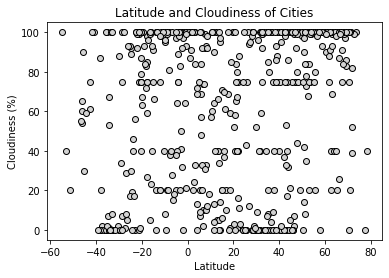

<Figure size 1440x1080 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_lat = city_data_df["Lat"]
y_hum = city_data_df["Cloudiness"]
plt.scatter(x_lat,y_hum,color='lightgrey',edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude and Cloudiness of Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.figure(figsize=(20,15))

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

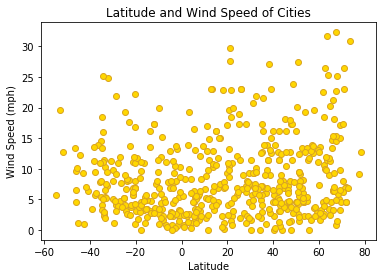

<Figure size 1440x1080 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_lat = city_data_df["Lat"]
y_hum = city_data_df["Wind Speed"]
plt.scatter(x_lat,y_hum,color='gold',edgecolor='goldenrod')

# Incorporate the other graph properties
plt.title("Latitude and Wind Speed of Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.figure(figsize=(20,15))

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---
# RESUME HERE
## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# Per y = mx + b, m == slope, b == intercept, r == r-value
# p == p-value, stderr = standard error

def linregplt(x,y,x_label,y_label,annotate):
    (m, b, r, p, stderr) = linregress(x,y)
    reg_val = (m * x) + b
    reg_equ = f"y = ({round(m,4)} * x) + {round(b,4)}"
    # Creating the base plots
    plt.figure(figsize=(12,8))
    plt.scatter(x,y,color='lightblue',edgecolor='steelblue')
    plt.plot(x,reg_val,color='red')
    # Formatting the graph
    plt.annotate(reg_equ,annotate,color='red',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    print(f"The correlation coefficient is: {r}.")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northhem_DF = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northhem_DF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,itoman,26.1247,127.6694,68.40,96,75,23.02,JP,1675994331
4,qaanaaq,77.4840,-69.3632,-9.00,60,0,9.08,GL,1675994332
6,yellowknife,62.4560,-114.3525,-4.45,77,20,4.61,CA,1675994098
7,albany,42.6001,-73.9662,48.04,85,100,3.00,US,1675994333
10,jamestown,42.0970,-79.2353,51.39,92,100,12.66,US,1675994067


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southhem_DF = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southhem_DF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alta floresta,-9.8756,-56.0861,71.11,96,100,2.75,BR,1675994330
1,kasongo,-4.4500,26.6667,67.62,95,100,2.93,CD,1675994331
2,new norfolk,-42.7826,147.0587,70.88,67,61,1.01,AU,1675994331
5,mataura,-46.1927,168.8643,61.48,33,54,4.59,NZ,1675994332
8,rikitea,-23.1203,-134.9692,80.06,73,0,17.58,PF,1675994333


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient is: -0.8627094623858045.


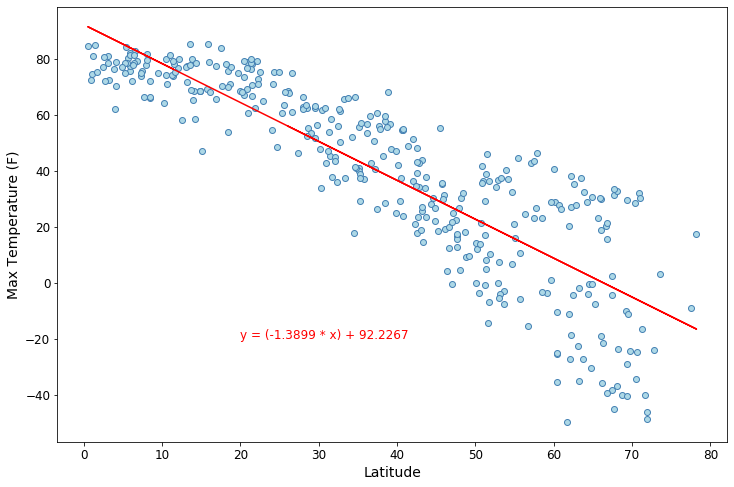

In [16]:
# Linear regression on Northern Hemisphere
x = northhem_DF["Lat"]
y = northhem_DF["Max Temp"]
linregplt(x,y,"Latitude","Max Temperature (F)",(20,-20))

The correlation coefficient is: 0.36191499000847593.


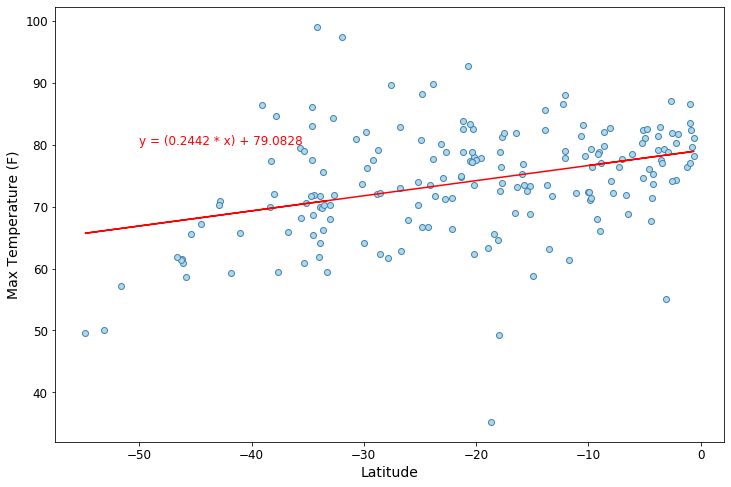

In [17]:
# Linear regression on Southern Hemisphere
x = southhem_DF["Lat"]
y = southhem_DF["Max Temp"]
linregplt(x,y,"Latitude","Max Temperature (F)",(-50,80))

For cities in the Northern Hemisphere, their maximum recorded temperatures tend to get higher as they are located closer to the Equator (as their latitudes approach zero), while temperatures tend to decline as they move away from the Equator. The same trend is noticed with cities in the Southern Hemisphere as well, although their maximum temperatures are far more dispersed. Factors such as the city's specific geographic location and climate could be responsible for the weaker correlation between latitude and maximum recorded temperature for Southern Hemisphere cities.

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.38244671077234255.


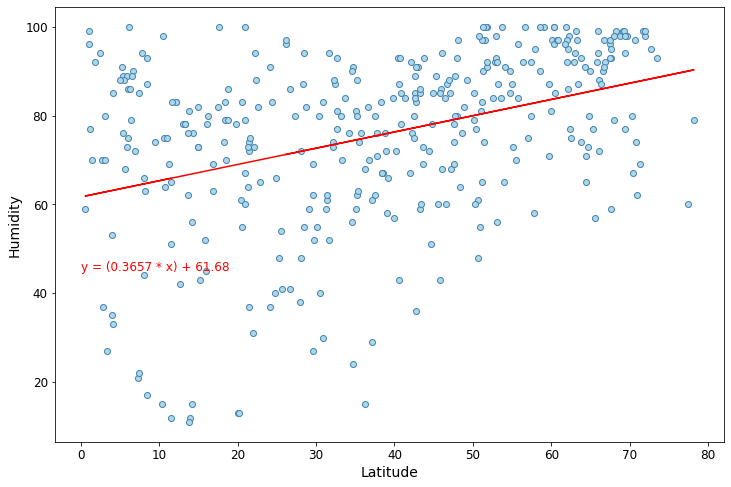

In [18]:
# Northern Hemisphere
x = northhem_DF["Lat"]
y = northhem_DF["Humidity"]
linregplt(x,y,"Latitude","Humidity",(0,45))

The correlation coefficient is: 0.3909503056679265.


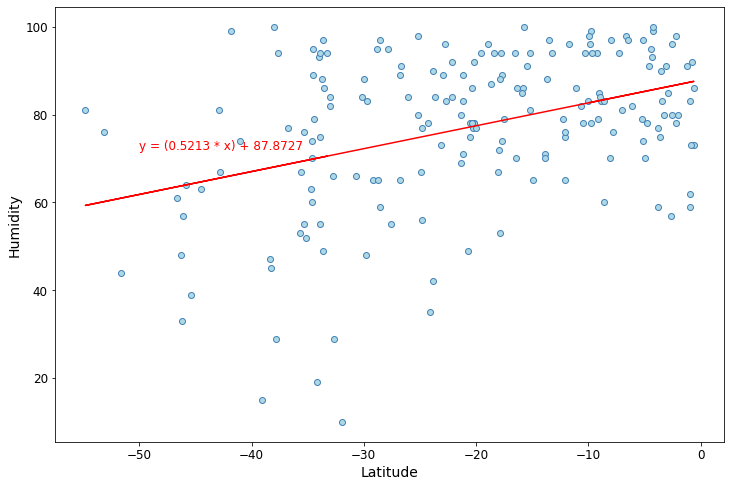

In [19]:
# Southern Hemisphere
x = southhem_DF["Lat"]
y = southhem_DF["Humidity"]
linregplt(x,y,"Latitude","Humidity",(-50,72))

When it comes to humidity, cities in both Northern and Southern Hemispheres experience increased humidity as they head to more northern latitudes. However, the correlation coefficients for both sets of data are relatively small, so the correlation between latitude and humidity may not be very strong. Geographic factors may again come into play, such as climate and the distribution of landmass and climates between Northern and Southern Hemispheres, when it comes to the discrepancies between humidity for cities across both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.30504962464173546.


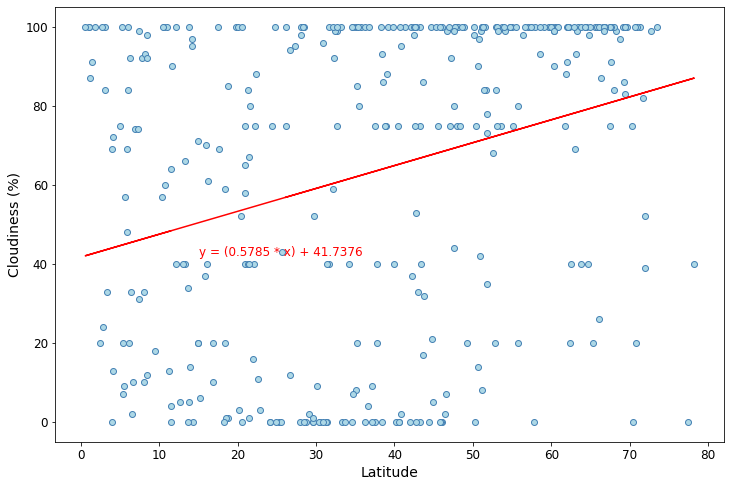

In [20]:
# Northern Hemisphere
x = northhem_DF["Lat"]
y = northhem_DF["Cloudiness"]
linregplt(x,y,"Latitude","Cloudiness (%)",(15,42))

The correlation coefficient is: 0.34621362546983725.


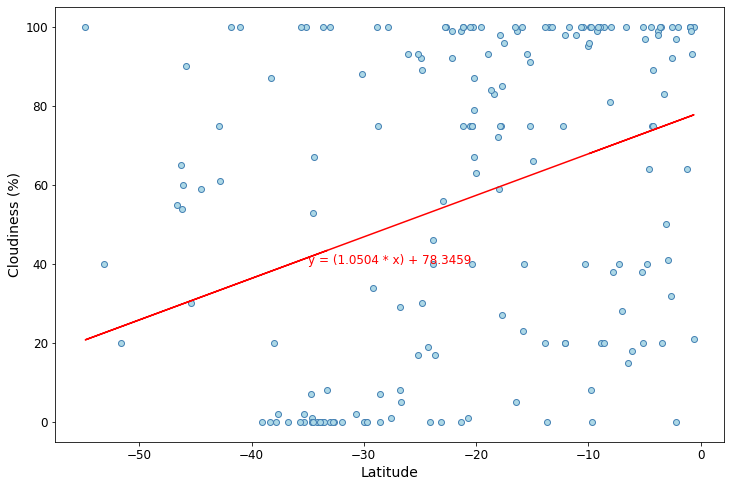

In [21]:
# Southern Hemisphere
x = southhem_DF["Lat"]
y = southhem_DF["Cloudiness"]
linregplt(x,y,"Latitude","Cloudiness (%)",(-35,40))

There is a very weak correlation, if any, between latitude and cloudiness for cities in both Northern and Southern Hemispheres. The data points are scattered all over the plot, and some cities across all latitudes have either fully cloudy or cloudless days, which further weakens any correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient is: 0.15915133965268402.


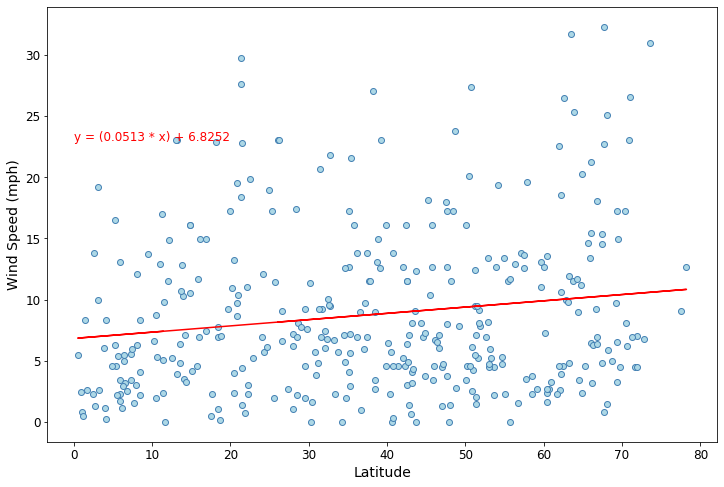

In [22]:
# Northern Hemisphere
x = northhem_DF["Lat"]
y = northhem_DF["Wind Speed"]
linregplt(x,y,"Latitude","Wind Speed (mph)",(0,23))

The correlation coefficient is: -0.23617097228229877.


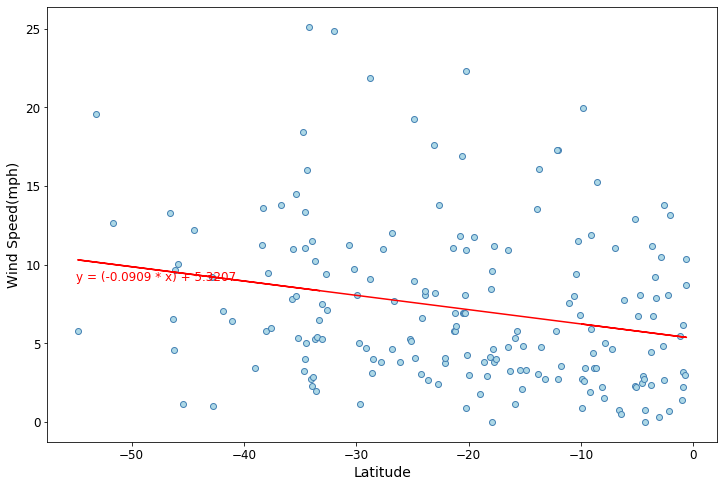

In [23]:
# Southern Hemisphere
x = southhem_DF["Lat"]
y = southhem_DF["Wind Speed"]
linregplt(x,y,"Latitude","Wind Speed(mph)",(-55,9))

Similarly, there is a weak correlation between latitude and wind speed for cities across both the Northern and Southern Hemispheres. The wide dispersion of the data points and the low correlation coefficients point to a lack of correlation between latitude and wind speed. Other geographic and climatic factors might better explain a city's wind speeds other than its latitude.